## An Ultra Quick, Hands-on Tutorial on Tensorflow
The purpose of this notebook is to provide a very quick introduction on how to use tensorflow to train a linear regression model with tensorflow. For data we use the famouse handwritten digits data, MNIST. Note that a **Neural Network** without any hidden layer is simply a linear regression, and that is what we study here, i.e., we build and train a linear regression model with Tensorflow. 

### Import the libraries

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
import numpy as np

### Imort the data

**note**: the method read_data_sets will be removed in the future versions try to use an alternative (follow the warning instructions when you run the following cell for the first time)

In [2]:
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Let's view an image of the mnist data set:

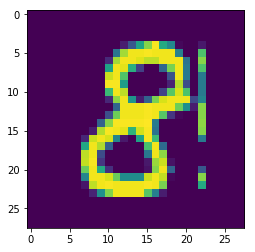

In [3]:
arr = mnist.train.images[9]
img = (np.reshape(arr, (28, 28)) * 100).astype(np.uint8)
plt.imshow(img)

Size of each sample is the number of pixels in the image, which is equal to the number of features per sample. 

In [4]:
arr.size

784

### Construct a linear regression model (i.e. Neural Network with no hidden layer)

In tensorflow the **placeholders** will only be fed later, that is why they are called *placeholders*. That is we do not provide any values for them until later with the **feed_dict** method, for instance. For consistency, I present all the placeholders with and underscore at the end.  

In [5]:
x_ = tf.placeholder(tf.float32, shape=[None, 784]) # placeholder for the input data (input layer); **None for num of samples
yreal_ = tf.placeholder(tf.float32, shape=[None, 10]) # there exist 10 possible outputs (i.e., digist from 0 to 9)

Unlike input layer and real data which are fed to the model (before and after training the model) the weights and biases are **variables** which need to be found during the training phase for given inputs and real ouputs. 

In [6]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [7]:
ypred_ = tf.matmul(x_, w) + b

Now we are ready to start a Tensorflow session, initialize the model, and start taining:

In [8]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [9]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=yreal_, logits=ypred_))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

Up to here no actual calculations were running (this is the notion of lazy computations). Below is where the actual training (optimization) is running:

In [11]:
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x_:batch[0], yreal_:batch[1]})

Now we check the accuracy. Since we have used one_hot encoding, we use the tf.argmax function to find the component with the highest value for each sample:

In [12]:
correct_prediction = tf.equal(tf.argmax(ypred_, 1), tf.argmax(yreal_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
accuracy.eval(feed_dict={x_:mnist.test.images, yreal_:mnist.test.labels})

0.9135